Source : https://zenodo.org/records/13935313

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("..\\data\\HR_raw_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
df.shape

(14999, 10)

In [26]:
#check missing values
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [27]:
# Check if any duplicates exist
print(df.duplicated().any())

# Count total duplicates
print(df.duplicated().sum())

#drop the duplicates
df = df.drop_duplicates()

True
3008


In [28]:
# rename sales column to department
df.rename(columns={'sales': 'department'}, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [30]:
df["satisfaction_level"].describe()

count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [31]:
df["left"].describe()
df["department"].describe()

count     11991
unique       10
top       sales
freq       3239
Name: department, dtype: object

#### 1. Overall Distribution of Attrition  
What percentage of employees have left the company vs. stayed?

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


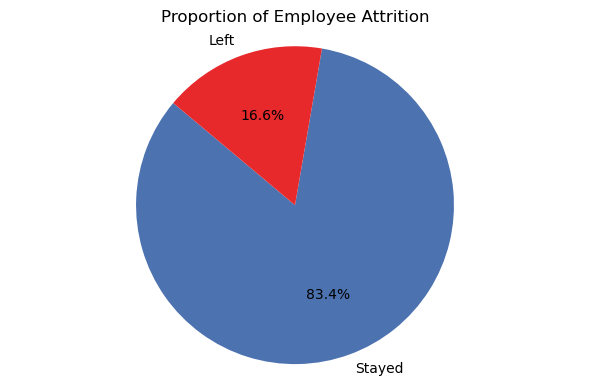

In [32]:
print(df['left'].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
plt.pie(df['left'].value_counts(), labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=140, colors=['#4C72B0', '#E7292B'])
plt.title('Proportion of Employee Attrition')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()
plt.show()

### How are employees distributed across different departments?

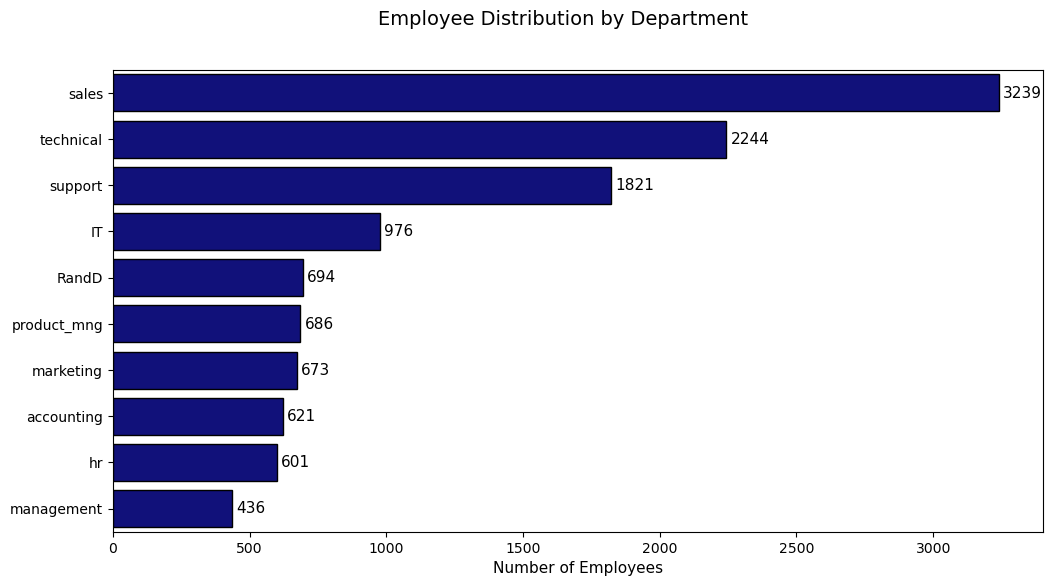

In [33]:
dept_counts = df['department'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))

ax = sns.countplot(data=df, y='department', order=dept_counts.index, edgecolor='black', orient = 'h', color='#00008B')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fontsize = 11, label_type = 'edge', padding = 3)

plt.suptitle('Employee Distribution by Department', fontsize =14)
plt.xlabel('Number of Employees', fontsize = 11)
plt.ylabel('', fontsize = 11)
plt.show()

### Satisfaction Level Distribution 

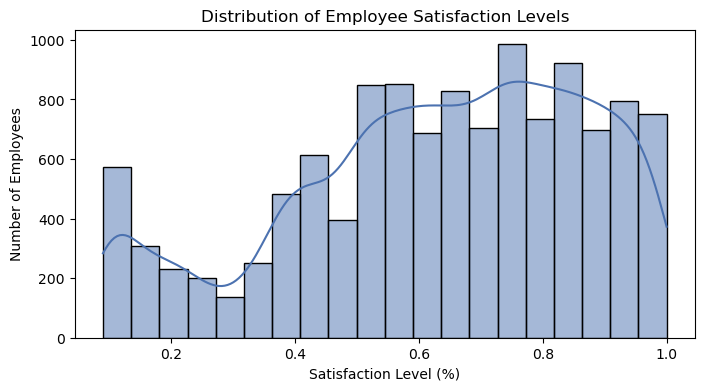

In [34]:
#create histogram for satisfaction_level
plt.figure(figsize=(8, 4))
sns.histplot(df['satisfaction_level'], bins=20, kde=True, color='#4C72B0')
plt.xlabel('Satisfaction Level (%)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Satisfaction Levels')
plt.show()

#### 2. Satisfaction Level Vs. Attrition
Do employees with lower satisfaction levels tend to leave more often?

        count      mean       std   min   25%   50%   75%   max
left                                                           
0     10000.0  0.667365  0.217082  0.12  0.54  0.69  0.84  1.00
1      1991.0  0.440271  0.265207  0.09  0.11  0.41  0.73  0.92


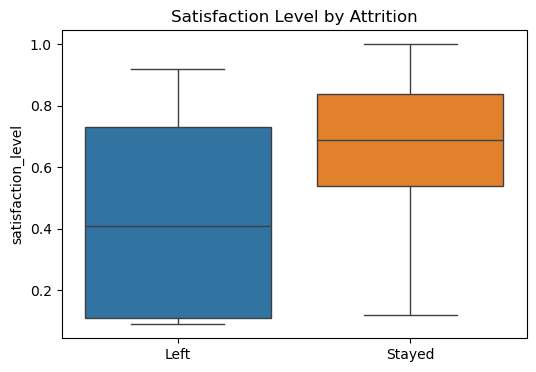

In [35]:
df['left_str'] = df['left'].map({0: 'Stayed', 1: 'Left'})
print(df.groupby('left')['satisfaction_level'].describe())
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df,
    x='left_str',
    y='satisfaction_level',
    hue='left_str',
    hue_order=["Left", "Stayed"],
    #palette={"Left": "#E7292B", "Stayed": "#4C72B0"}  # Left: red, Stayed: blue
)
plt.xlabel('')
plt.title('Satisfaction Level by Attrition')
plt.show()

### 3. Number of Projects Vs. Average Monthly Hours
Do employees who left the company have more projects or work longer hours?

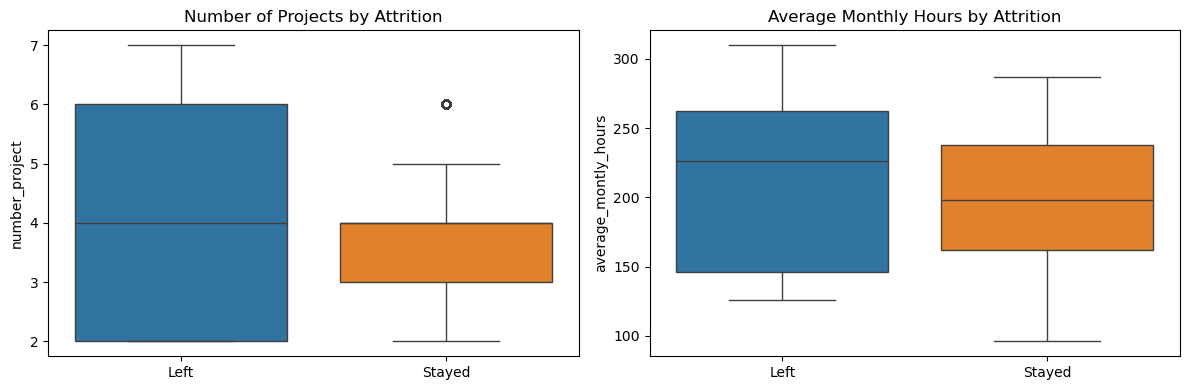

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(
    data=df, x='left_str', y='number_project', hue='left_str',
    hue_order=["Left", "Stayed"],
    #palette={"Left": "#E7292B", "Stayed": "#4C72B0"},
    ax=axes[0]
)
axes[0].set_xlabel('')
axes[0].set_title('Number of Projects by Attrition')
if axes[0].legend_ is not None:
    axes[0].legend_.remove()

sns.boxplot(
    data=df, x='left_str', y='average_montly_hours', hue='left_str',
    hue_order=["Left", "Stayed"],
    #palette={"Left": "#E7292B", "Stayed": "#4C72B0"},
    ax=axes[1]
)
axes[1].set_xlabel('')
axes[1].set_title('Average Monthly Hours by Attrition')
if axes[1].legend_ is not None:
    axes[1].legend_.remove()

plt.tight_layout()
plt.show()

### 4. Time Spent in Company Vs. Attrition
Does time spent at the company affect attrition?

                       Stayed       Left
time_spend_company                      
2                   98.934708   1.065292
3                   83.159923  16.840077
4                   75.311721  24.688279
5                   54.613936  45.386064
6                   79.889299  20.110701


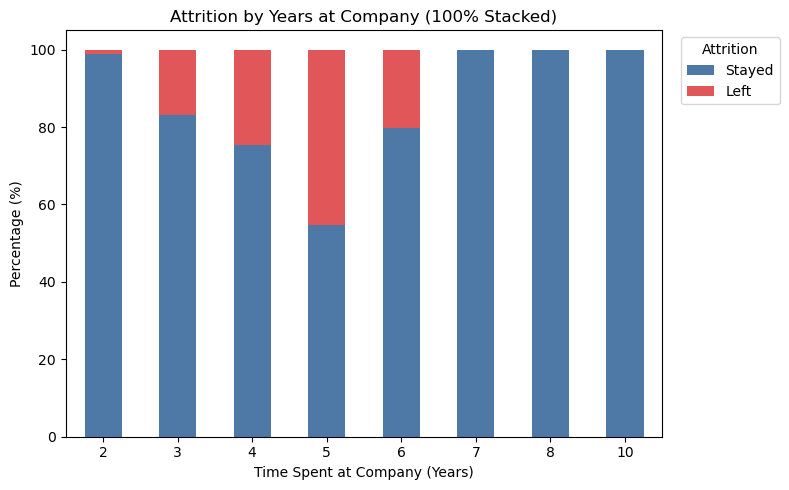

In [38]:
grouped = df.groupby('time_spend_company')['left'].value_counts().unstack(fill_value=0)
grouped.columns = ['Stayed', 'Left']
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
print(percentages.head())

fig, ax = plt.subplots(figsize=(8, 5))
percentages.plot(kind='bar', stacked=True, ax=ax, color=['#4e79a7', '#e15759'])

plt.title('Attrition by Years at Company (100% Stacked)', fontsize=12)
plt.ylabel('Percentage (%)')
plt.xlabel('Time Spent at Company (Years)')
plt.xticks(rotation=0)

# Place legend outside the chart
plt.legend(title='Attrition', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 5. Salary vs Attrition
Are employees with lower salary more likely to leave?

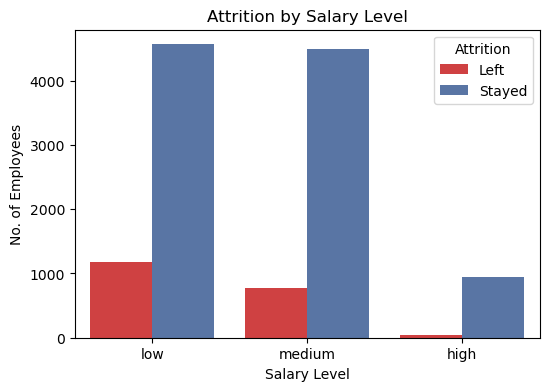

In [39]:
#plot attrition by salary level
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x='salary',
    hue='left_str',
    palette={"Stayed": '#4C72B0', "Left": '#E7292B'}  
)
plt.title('Attrition by Salary Level')
plt.xlabel("Salary Level")
plt.ylabel("No. of Employees")
plt.legend(title='Attrition')
#plt.legend(labels=['Stayed', 'Left'])
plt.show()

### 6. Department Vs. Attrition
Which departments have the highest attrition?

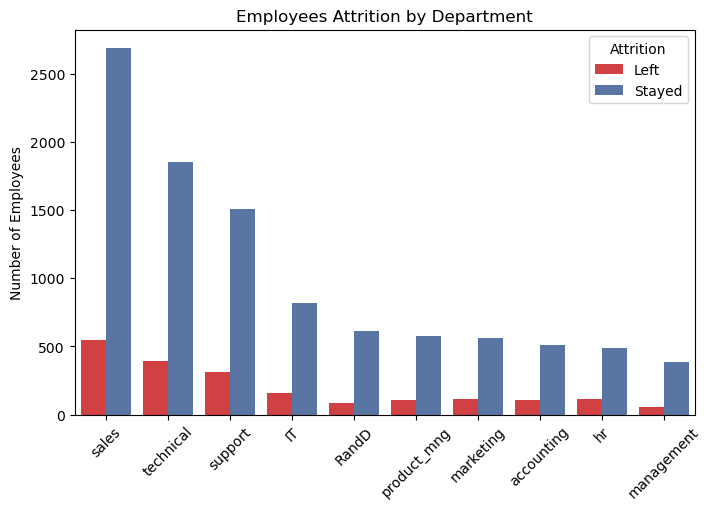

In [40]:
order = df['department'].value_counts(ascending=False).index
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='department',
    hue='left_str',
    palette={"Stayed": '#4C72B0', "Left": '#E7292B'},
    order=order
)
plt.xticks(rotation=45)
plt.title('Employees Attrition by Department')
plt.xlabel('')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

### 7. Correlation Heatmap
Which numerical features are strongly correlated with attrition?

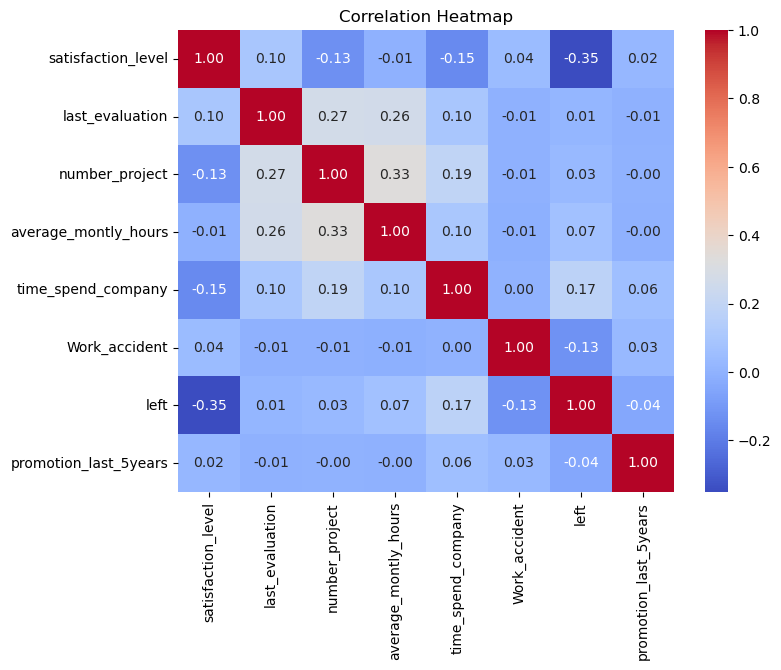

In [41]:
plt.figure(figsize=(8, 6))
corr = df.drop(columns=['department', 'salary', 'left_str']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap') 
plt.show()